# Popup Drifters 2020 Deployment

## Ingesting Data

In [13]:
import pandas as pd

In [14]:
filein = '/Users/bell/Programs/Python/EcoFOCI_Jupyter_Notebooks/2020/Popups/pop-up location planning_16_june.xlsx'
mfile = '/Users/bell/Programs/Python/EcoFOCI_Jupyter_Notebooks/2020/Popups/moorings.csv'

In [17]:
df = pd.read_excel(filein)
df.columns = ['name','group','latitude','longitude']
df=df.dropna()
df

,name,group,latitude,longitude
4,float name,priority group,latitude,longitude
5,PUF_3,1,55.2328,-166.13
6,PUF_5,1,56.2585,-168.297
7,PUF_6,1,56.6904,-171.198
8,PUF_9,1,58.3807,-172.573
9,PUF_10,1,58.9418,-174.903
10,PUF_11,1,59.6862,-176.936
11,PUF_1,2,56.7662,-161.752
12,PUF_2,2,55.448,-163.717
13,PUF_8,2,58.4209,-167.632


In [18]:
dfm = pd.read_csv(mfile)
dfm

,site,latitude,longitude
0,M2,56.87,-164.04
1,M4,57.87,-168.89
2,M5,59.92,-171.70
3,M8,62.20,-174.68


## Making Maps

In [45]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmocean

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 16),
                           subplot_kw=dict(projection=projection))
    if (projection == ccrs.PlateCarree()) or (projection == ccrs.Mercator()):
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1., color='gray', alpha=0.25, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 10, 'color': 'gray'}
        gl.xlabel_style = {'size': 10, 'color': 'gray'}
    return fig, ax

projection=ccrs.Mercator()
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')


In [46]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [35]:
#using xarray for data read
import xarray as xa
import cmocean

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(server_url) 

bathy_sub = bathy.sel(latitude=slice(65,52),longitude=slice(-180,-150))

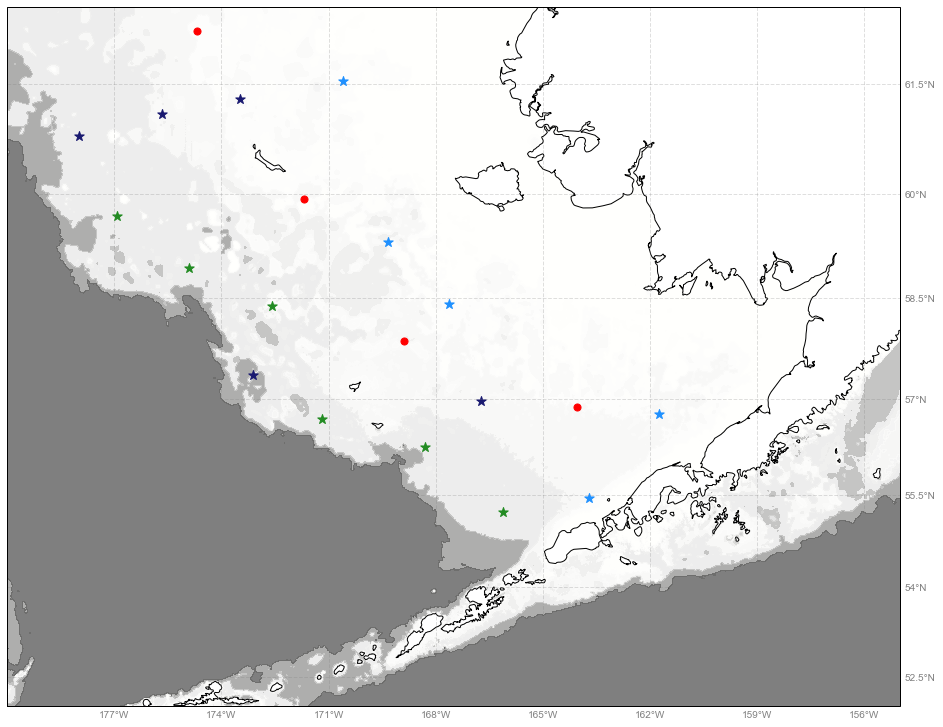

In [47]:
extent = [-180, -155, 52, 62]
fig,ax = make_map(projection=projection)

ax.contourf(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, 
            levels=[-1000, -200, -100, -70, -50,], 
            cmap=cmocean.cm.gray,
#            colors=('#000000','#737373','#969696','#bdbdbd','#f0f0f0','#f8f8f8'), 
            extend='both', alpha=.5,
            transform=transformation)
ax.scatter(dfm.longitude, dfm.latitude, s=50, color='red', marker='o',
                               transform=transformation)
ax.scatter(df[df.group == 1].longitude, 
           df[df.group == 1].latitude, s=100, color='forestgreen', marker='*',
                               transform=transformation)
ax.scatter(df[df.group == 2].longitude, 
           df[df.group == 2].latitude, s=100, color='dodgerblue', marker='*',
                               transform=transformation)
ax.scatter(df[df.group == 3].longitude, 
           df[df.group == 3].latitude, s=100, color='midnightblue', marker='*',
                               transform=transformation)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)

## Try with pyGMT

In [39]:
import pygmt
import cmocean

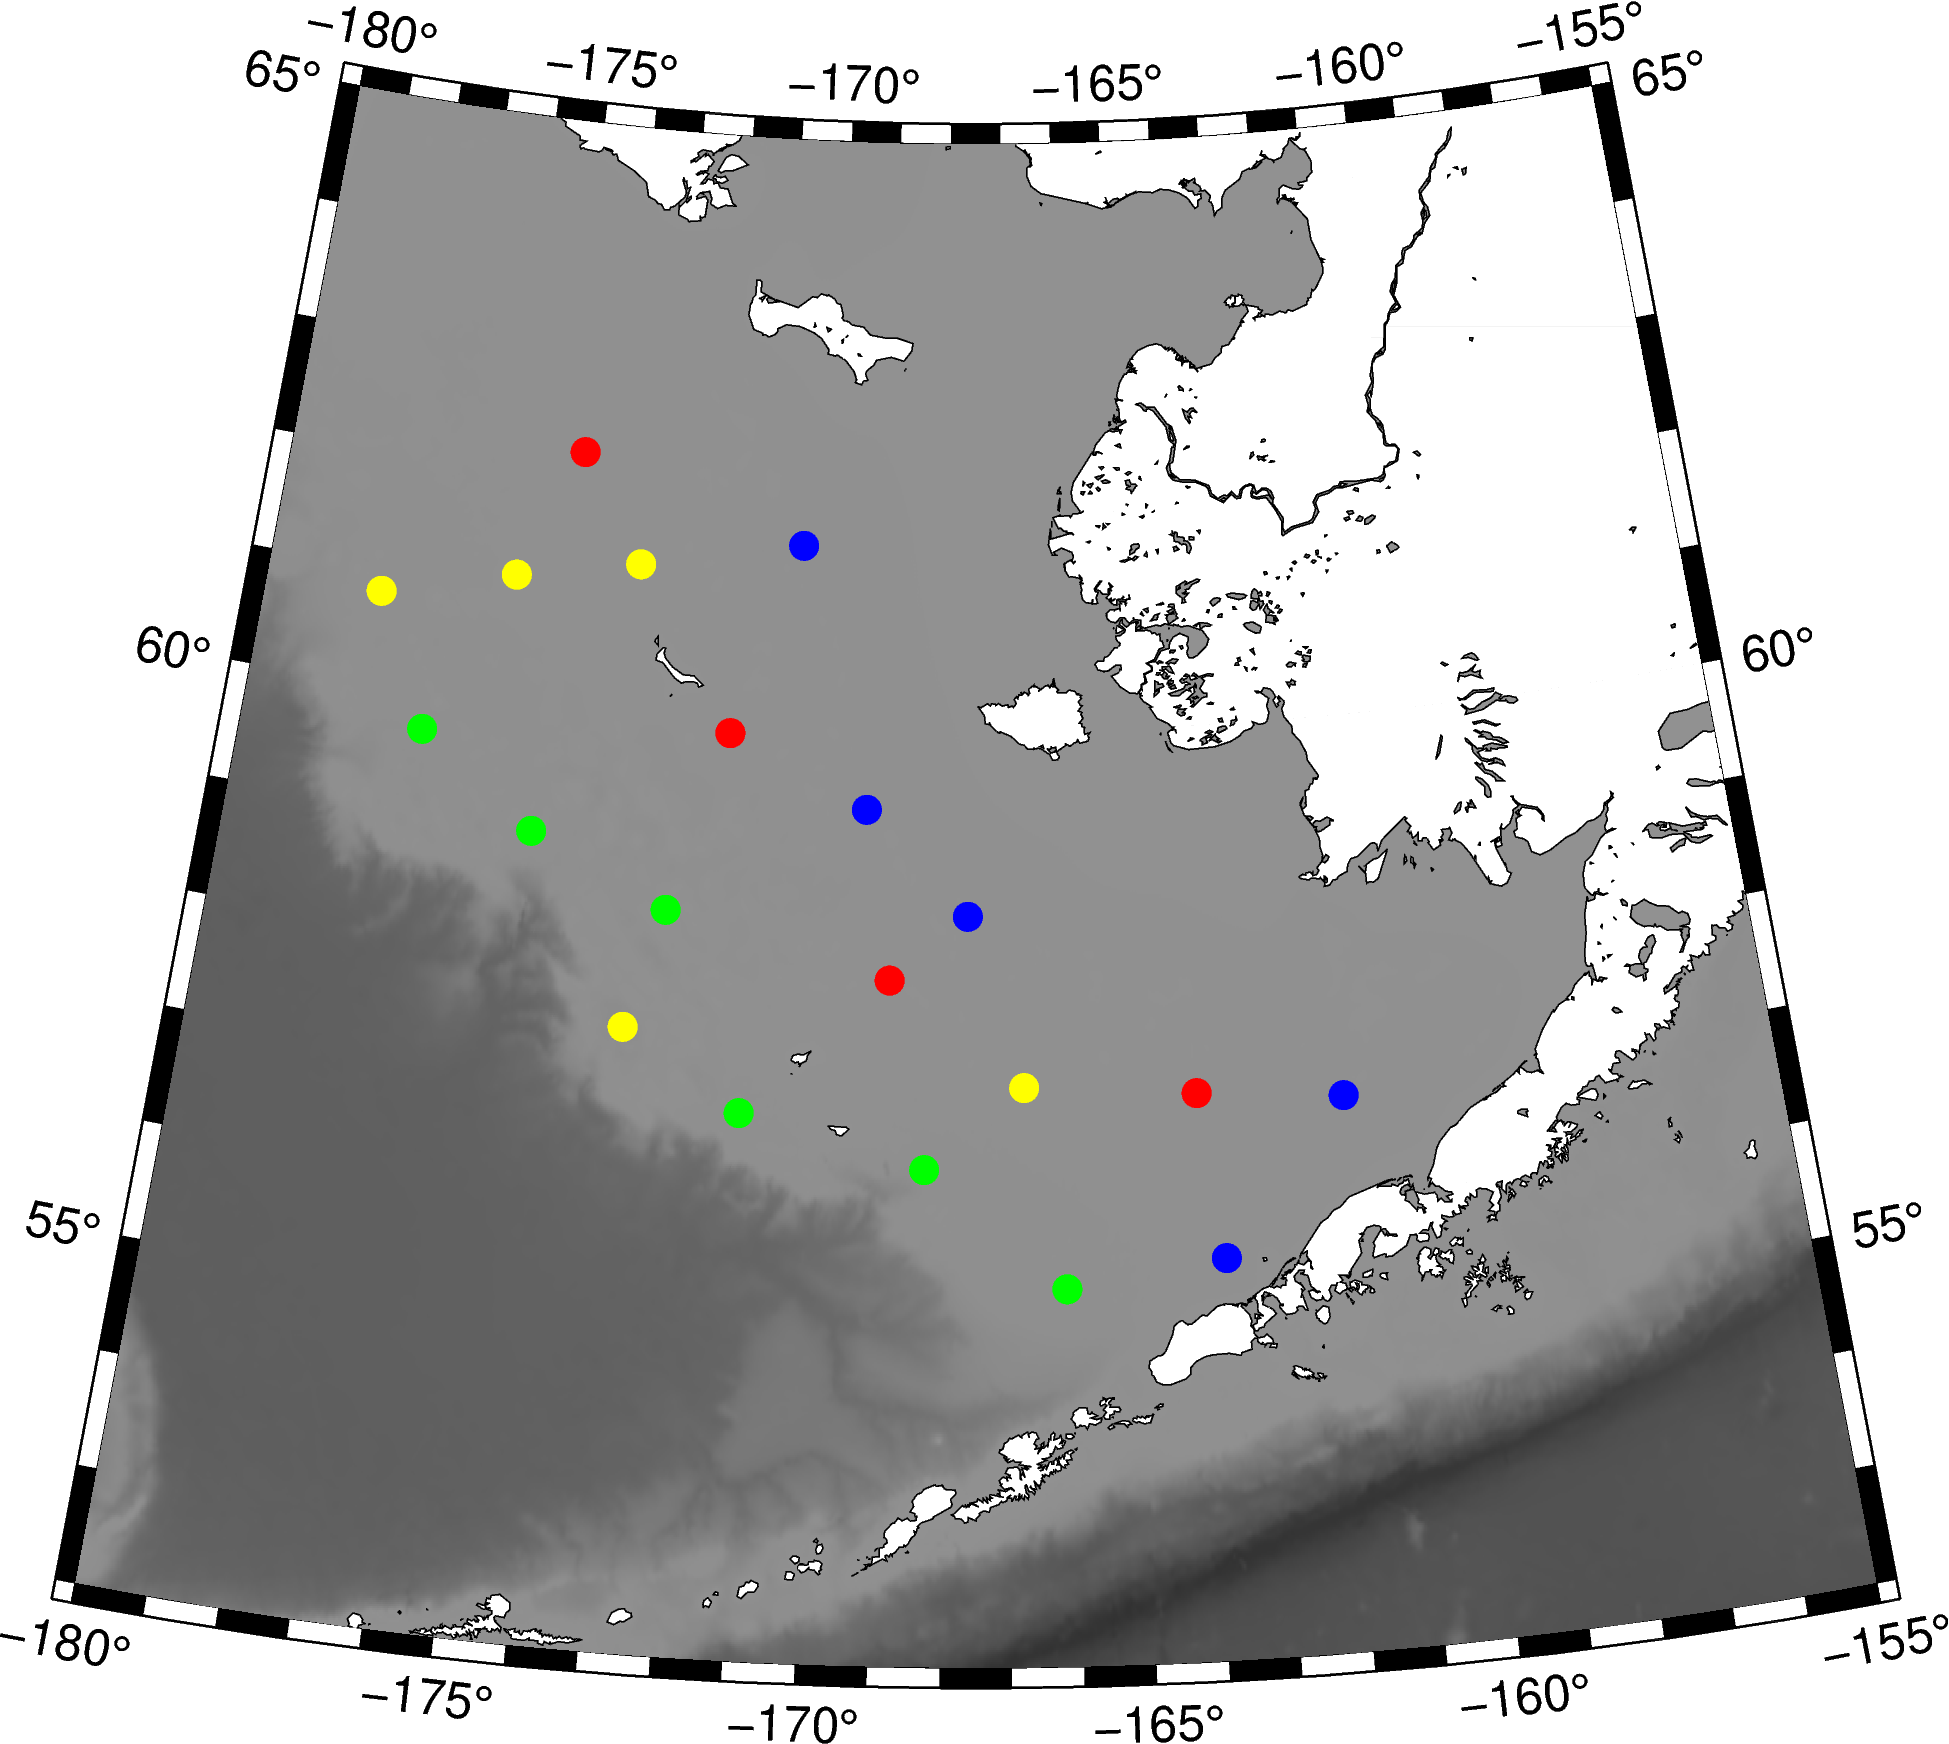

In [51]:
extent = [-180, -155, 52, 65]
grid=pygmt.datasets.load_earth_relief(resolution='01m')

fig = pygmt.Figure()
fig.basemap(region=extent, projection='B-167.5/65/55/65/6i', frame=True)
fig.grdimage(grid=grid, cmap="gray")
fig.coast(shorelines=True, land='white')
fig.plot(dfm.longitude, dfm.latitude, color='red', style='c.25c')
fig.plot(df[df.group == 1].longitude.astype(float), 
         df[df.group == 1].latitude.astype(float), color='green', style='c.25c')
fig.plot(df[df.group == 2].longitude.astype(float), 
         df[df.group == 2].latitude.astype(float), color='blue', style='c.25c')
fig.plot(df[df.group == 3].longitude.astype(float), 
         df[df.group == 3].latitude.astype(float), color='yellow', style='c.25c')
fig.show()